# Sınıflandırma

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon

^^Amacımız sınıflandırma problemleri için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.

^^ Bağımlı değişken kategoriktir.

^^Adını bağımlı değişkene uygulanan logit değişkenden alır.

^^Doğrusal regresyonda aranan varsayımlar burada aranmaz daha esnektir.

^^Üretilen değerler 0-1 arasında olur.

# Model

In [2]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [4]:
df["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

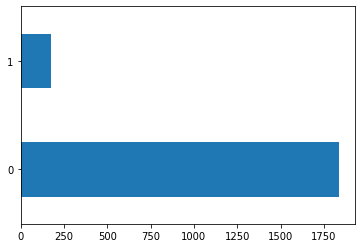

In [5]:
df["bad"].value_counts().plot.barh();

Burada aradaki fark çok fazladır bu yüzden yapılacak olan testler büyük önem taşımaktadır.

Dengesiz bir veriseti oluşturur.Test ve train için ayrılmış olan setin içerisindeki bağımlı değişken sınıfı incelenmelidir.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [8]:
y = df["bad"]
X = df.drop(["bad"], axis=1)

#statsmodels

In [9]:
dummy_data = pd.get_dummies(data[["job","reason"]])

In [16]:
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)


In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [18]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        18:18:16   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

Lineer Regression modelindeki gibi R-square karşılaştırıp yüksek olanı seçme durumu yok.Çünkü bir classification problem var.Burada hatalarımın nasıl dağıldığına dair bir bilgim yok.Burada gerçek ve tahminsel değerlere bakacağız.(Contingency Table)
Coefficient değerleri ve z değerlerini karşılaştırıp,"yoj,clage,ninq,clno,debtinc" gibi bazı değişkenleri modelden atarak daha iyi bir model kurulabilir.

#scikit-learn

In [19]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
loj_model.intercept_

array([-0.00256361])

In [21]:
loj_model.coef_

array([[-3.45744369e-05, -6.99561375e-06, -1.60344396e-06,
        -1.76926822e-02,  6.56856812e-03,  1.17615246e-02,
        -8.77179764e-03,  4.17663965e-03, -1.69201255e-02,
         2.71202775e-02]])

# Tahmin & Model Tuning


**Üstte modeli,değişkenleri tanımladık.Asıl classification'daki olay bunu tahmin etmekteki gücümüz.Gerçek değerlerini biliyorum bir de tahmin etmeliyiz. Kredisini ödüyor dediklerimizin kaçı öyle çıktı bunu belirlemeliyiz. * Confusion matrix çizeceğiz.Datayı test ve train diye ayırmalıyız.Ama öncesinde x değerlerimle tekrar prediction yapmam gerekiyor.

In [53]:
y_pred = loj_model.predict(X)

In [17]:
confusion_matrix(y, y_pred)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

#Üstteki satır(1835,5) bize kredi borcunu ödeme eğiliminde olanları gösteriyor.

#Alttaki satır (178,0) bize borcunu ödemeyenleri gösteriyor.

*1835 kişi doğru bulduğunu söylüyor.Borcunu ödemeyenlere ödedi dediğim yer.

*Borcunu ödeyenlerin 5'ine ödemiyor dedim.

*Borcunu ödememesine rağmen 178 kişiye ödedi dediğim yer.

*Kredi borcunu ödeyen ve gerçekte benim bildiğim 0 kişi vardır.

In [18]:
accuracy_score(y, y_pred)

0.9093161546085233

In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



#Modelde neyi ne kadar doğru yaptığımı gösteriyor.

#Farklı modelleri kontrol ederken ilk olarak "overall accuracy "değerine bakacağız.

#Burada recall değeri modeldeki 1 değerlerimi ne kadar doğru tahmin ediyoruz bunu gösterir.Gerçekten kredisini ödeyen insanların tamamını doğru tahmin etmişiz.Gerçekte kredisini ödemeyen insanların ise hiçbirini tahmin edememişsiz.Yani model kredisini ödeyen insanları tahmin etmekte başarılı iken,ödemeyenleri tahmin etmekte başarısızdır.

#Burada f1-score değeri precision ve recall değerlerinin ağırlıklı ortalamasını gösteriyor.Burada 0 değerini ne kadar düzgün öğrendiğime bakabilmek için bu değere bakarım( %95)

In [20]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.93791535, 0.06208465],
       [0.81229489, 0.18770511],
       [0.98697812, 0.01302188],
       [0.83476237, 0.16523763],
       [0.82000557, 0.17999443],
       [0.98423197, 0.01576803],
       [0.85334995, 0.14665005],
       [0.96480699, 0.03519301],
       [0.75102422, 0.24897578],
       [0.96060046, 0.03939954]])

#İlk sütun 0 olma olasılığını, ikinci sütun 1 olma olasılığını verir ve ikisinin toplamı 1 olmalıdır.

#İlk satır için kredi borcumu ödeme olasılığım %94 , ödememe olasılığım ise %6'tir.

#0.95 değeri 0.5'ten büyük olduğu için üstteki kodda 0 olarak assign ettik.

In [22]:
y[0:10]         #Gerçek y (bad) değerleri

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [23]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [24]:
y_probs[0:10]    #Üstteki 1 olma değerlerinin aynısı.Sadece bunlar da gösterilebilir.

array([0.06208465, 0.18770511, 0.01302188, 0.16523763, 0.17999443,
       0.01576803, 0.14665005, 0.03519301, 0.24897578, 0.03939954])

In [25]:
y_pred = [1 if i > 0.16 else 0 for i in y_probs]

In [26]:
y_pred[0:10]

[0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

In [27]:
confusion_matrix(y, y_pred)

array([[1494,  346],
       [  94,   84]], dtype=int64)

In [28]:
accuracy_score(y, y_pred)

0.7819623389494549

In [29]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1840
           1       0.20      0.47      0.28       178

    accuracy                           0.78      2018
   macro avg       0.57      0.64      0.57      2018
weighted avg       0.88      0.78      0.82      2018



* Model üsttekine göre artık daha kötü bir 1 tahmini yaptı.Ama 0 tahmini değeri arttı. *Gerçekten borcunu ödemeyenlerin %47'u tahmin edildi. Yani eski modele göre artık neredeyse yarısı tahmin edilebiliyor.

In [30]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.06208465, 0.18770511, 0.01302188, 0.16523763, 0.17999443])

#ROC eğrisi, ikili sınıflandırma sistemlerinde ayrım eşik değerinin farklılık gösterdiği durumlarda, hassasiyetin kesinliliğe olan oranıyla ortaya çıkmaktadır.

*Datanın asıl gücünü gösterir.Datamın ne kadarına gittiğimde ne kadarını buluyorum.Düz ve yüksekte bir alan görmek her zaman daha iyidir.Hedefleme yaparak hastaların hepsine gitmek yerine doğru orana gidilebilir.

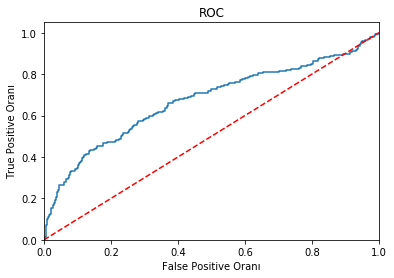

In [31]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [32]:
logit_roc_auc   #ROC Curve altında kalan alan.

0.4986413043478261

#Tahmin ettiğim ve gerçek x değerlerimi karşılaştırarak alanımı buldum. Alanın 1 olduğunu düşünürsek 0.49 ortalamaya yakındır.

***Grafiğe bakarsak, datamın yüzde 20'sine gittiğimde yaklaşık %50'sini doğru tahmin ediyorum.Bir hedefleme yaparken herkese gitmek yerine random yüzde 20yi seçsem bile %50 doğruluk yakalıyorum.

***Mavı eğri ne kadar yukarı çıkıp sonradan düzleşirse benim için o kadar iyidir.

In [33]:
#x ve y leri ayırırım.X değerlerinin ve y değerlerinin %20'sini test için ayıracağım.

#Önce %80iyle model kuracağım kalan %20 ile de doğru yapıp yapmadığımı test edeceğim.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)


In [35]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9133663366336634

In [37]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9158536585365855

#Uygun x ve y setlerini seçti.Accuracy değeri %91 çıktı.Buna göre üstte gerçekleştirdiğimiz regresyon kabul edilebilir.

#Eğer bu değer accuracy değerlerinden daha düşük çıksaydı ,randomlıktan gelen bir açıklayıcılık yok diyebilirdik.Tekrar model kurmak gerekecekti.

# Gaussian Naive Bayes

Olasılık temellidir.Amacı: belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.
    
** Çok sınıflı senaryolarda veya verisetinde kategorik değişken sayısı sürekli değişken sayısı kadar olduğunda iyi çalışır.

In [34]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [38]:
nb_model.predict_proba(X_test)[0:10]

array([[0.98928136, 0.01071864],
       [0.9597811 , 0.0402189 ],
       [0.98780831, 0.01219169],
       [0.98648937, 0.01351063],
       [0.99486944, 0.00513056],
       [0.97528611, 0.02471389],
       [0.98631831, 0.01368169],
       [0.97593666, 0.02406334],
       [0.4379753 , 0.5620247 ],
       [0.99478556, 0.00521444]])

In [39]:
y_pred = nb_model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.8960396039603961

In [41]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

#Valide edilmiş değer , yukarıdaki regresyon sonucu olan test datasına göre accuracy olarak daha fazladır.

0.9232926829268292

# KNN

Tahminler gözlem benzerliğine göre yapılır.

Dışsal parametre olarak komşu sayısı belirlenir.

# Model & Tahmin

In [7]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)


In [8]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.9158415841584159

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.57      0.11      0.19        35

    accuracy                           0.92       404
   macro avg       0.75      0.55      0.57       404
weighted avg       0.89      0.92      0.89       404



Tahmin edilen KNN modelinde accuracy score modelin iyi açıklandığını gösterir ama 1 olma oranı yüzde 11.Bu bize düşük bir 1 tahmin etme gücü olduğunu gösterir.

# MODEL TUNING

In [12]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [5]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9132620197837589
En iyi parametreler: {'n_neighbors': 17}


17 sayısı en optimum olması gereken komşu sayımızdır.

In [13]:
knn = KNeighborsClassifier(17)
knn_tuned = knn.fit(X_train, y_train)

In [14]:
knn_tuned.score(X_test, y_test)

0.9183168316831684

In [43]:
y_pred = knn_tuned.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.9183168316831684

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.06      0.11        35

    accuracy                           0.92       404
   macro avg       0.96      0.53      0.53       404
weighted avg       0.93      0.92      0.88       404



Burada bulunan accuracy score çok iyidir.Ama testin gücünü ifade eden classification reporta bakarsak modelin borcunu ödemeyen insanları tahmin etmekte başarısız olduğunu görüyoruz.(%6)

# SVC

Support Vector Classification: Amaç iki sınıf arasındaki ayrımın optiumum olmasını sağlayacak hiper-düzlemi bulmaktır.En az hatayla maksimum noktayı bulmuştuk regresyonda burada ise içerisinde mümkün olduğunca az gözlem ayrıştırabilen marjin bulacağız.

# Model & Tahmin

In [55]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [ ]:
svm_model

In [119]:
y_pred = svm_model.predict(X_test)

In [120]:
accuracy_score(y_test, y_pred)

0.9207920792079208

# Model Tuning

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# RBF SVC - Doğrusal Olmayan SVM

# Model & Tahmin

In [55]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [56]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [57]:
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9133663366336634

# Model Tuning

In [59]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [182]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 525 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   51.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [183]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 0.0001, 'gamma': 0.0001}


In [184]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [185]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9133663366336634

^^Buradaki C parametresi, aykırı gözlemlerin göreceli olarak etkilerini kontrol altında tutup oluşacak olan düzlemin oluşmasını kontrol edecek sistemdir.

^^Gama Kernelde kullanılan bir parametredir.

# Yapay Sinir Ağları

Yapay Sinir Ağları(YSA): İnsan beyninin bilgi işleme sistemini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen yöntemlerdir.

# Model & Tahmin

In [43]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler  

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_test_scaled[0:5]

array([[ 0.68941255,  0.43085191,  0.47278238, -1.19625189,  1.56477931,
        -0.33077825,  0.08497539,  0.54812556,  1.54776915,  0.12368953],
       [ 0.22402982,  0.78514133,  1.32140428, -0.40593238, -0.27466265,
        -0.33077825,  0.38291777,  1.7509463 ,  0.1817688 ,  1.05157074],
       [-0.17747685,  1.07182394,  0.99841583, -0.66937222, -0.27466265,
        -0.33077825, -0.28762812, -0.65469518, -0.13346205, -0.98016717],
       [-0.25047806, -1.2014695 ,  1.08722937, -0.01077263, -0.27466265,
        -0.33077825,  1.45637631, -0.65469518,  0.49699965, -0.76576556],
       [-1.08086685,  0.51487143,  0.17545567,  1.70158629, -0.27466265,
        -0.33077825, -0.72412658, -0.65469518, -1.18423155,  0.40640423]])

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [50]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.948019801980198

Parametre girmeden modeli bir fonksiyon şeklinde kurduk.

# Model Tuning

In [51]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [52]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [19]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 37.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [20]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [53]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.0001, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [54]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9529702970297029

# CART

# Model & Tahmin

In [57]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [60]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57151 sha256=185ab33f61297a1046b13148f458c17c948119659b01246ba38af10f9a8dd04b
  Stored in directory: c:\users\dell®­\appdata\local\pip\cache\wheels\1f\f6\09\b8aec43d39ab30463488d91526f29ba56155a6a6d61cf69986
Successfully built skompiler


In [99]:
from skompiler import skompile


In [ ]:
print(skompile(cart_model.predict).to("python/code"))

In [110]:
x = [9]

In [111]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [112]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9257425742574258

# Model Tuning

In [61]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [63]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1712 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   23.9s finished


In [64]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 9, 'min_samples_split': 2}


#final

In [65]:
cart = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 22)
cart_tuned = cart.fit(X_train, y_train)

In [66]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9381188118811881

# Random Forests

^^ Birden çok karar ağacının tahminlerinin bir araya getirilerek yeni bir ağaç topluluğu oluşması.

^^Kullanımı ,uygulanması ve sistem entegrrasyonu kolaydır.Hem regresyon hem classification gerçekleştirebilir.

^^Veri setindeki sonuç değişkeni ile ilgili en iyi kararı verebilmek amacıyla diğer bağımsız değişkenler için en iyi kombinasyonları oluşturmaya çalışır.

^^Gözlem seçiminde rassallığı sağlar,değişkenler random subspace yöntemi ile seçilir.

^^Ağaçlar düğüme ayrılır burada en üstteki değişken en önemli değişkendir.Hangi değişkenlere uygulanacağı bu değişkenlerden rastgele seçilir.(Daha küçük)

^^Ağaç oluşturmada veri setinin 2/3'ü kullanılır.Kalanı test için.

In [68]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [71]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.948019801980198

# Model Tuning

In [73]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [75]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [127]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 11.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [128]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 1000}


#final

In [78]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

In [131]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

**Değişken önem düzeyi bulma işlemi yaptık.

**Yapılan bu modelde kredi borcunu ödeyip ödememe durumunu etkileyen diğer değişkenlere baktığımızda debtinc,derog value değişkenleri ilk 3 sırada önem taşımaktadır.

***DEBTINC : Debt-to-income ratio #borç-gelir oranı , DEROG : Number of major derogatory reports #uygunsuz davranis raporlarinin sayısı , *VALUE : Value of current property #value: bulunan mal değeri
    
**Buradaki yorum şu şekilde olabilir: Kişini krediyi ödeyip ödememe durumu güncel mal varlığına (value), borç-gelir oranına(debtinc)bağlıdır. 

Text(0.5, 0, 'Değişken Önem Düzeyleri')

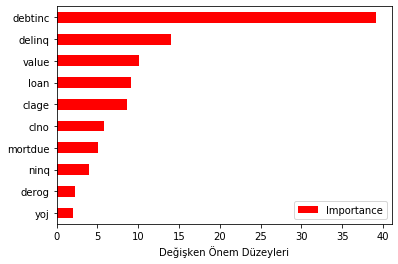

In [132]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

Burada artıklar üzerine tek bir tahminsel model formunda olan model serileri kurulur.

Adaboost: Adaptive Boosting = Zayıf öğrenicileri bir araya getirip güçlü bir sınıflandırıcı çıkabilir mi diye uğraşılır.

^^Seri içerisindeki bir model , bir önceki modelin tahmin artıklarının residualların üzerine fit edilerek model oluşturulur.

In [80]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [83]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529702970297029

# Model Tuning

In [84]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [85]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [86]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [33]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 15.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [34]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [87]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 100)

In [88]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [89]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

# XGBoost

Bu model GBM modelinin hız ve tahmin performansını arttırmak üzere optimize edilmiş,ölçeklenebilir,farklı platformlara entegre edilebilir halidir.

In [90]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [91]:
!pip install xgboost

In [92]:
from xgboost import XGBClassifier

In [93]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [94]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9603960396039604

# Model Tuning

In [96]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [98]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [47]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 53.9min finished


[15:48:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [48]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 0.8}

In [99]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 1000,
                    subsample = 0.8)

In [100]:
xgb_tuned =  xgb.fit(X_train,y_train)

[18:25:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [101]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9579207920792079

# LightGBM

XG Boostun eğitim süresi performansını arttırmaya yönelik geliştirilen bir modeldir. ^^Daha performanslıdır. ^^Level-wise büyüme stratejisi yerine leaf-wise stratejisini izler.

In [102]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [103]:
from lightgbm import LGBMClassifier

In [104]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [105]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9603960396039604

# Model Tuning

In [106]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [107]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [108]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)


In [59]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1105 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1550 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2077 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2684 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 3373 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 4142 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 4993 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 26.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [60]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 10,
 'n_estimators': 2000,
 'subsample': 0.6}

In [109]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 2000,
                       min_child_samples = 10)

In [110]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [111]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529702970297029

# CatBoost

# Model & Tahmin

In [112]:
data = pd.read_csv("bankdata.csv")
df = data.copy()
df = df.dropna()


dummy_data = pd.get_dummies(data[["job","reason"]])
y = df["bad"]
X =df.drop(["job","reason","bad"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [113]:
from catboost import CatBoostClassifier

In [115]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.012639
0:	learn: 0.6783924	total: 74.3ms	remaining: 1m 14s
1:	learn: 0.6637349	total: 78.2ms	remaining: 39s
2:	learn: 0.6493370	total: 82.2ms	remaining: 27.3s
3:	learn: 0.6364432	total: 85.1ms	remaining: 21.2s
4:	learn: 0.6229083	total: 90.3ms	remaining: 18s
5:	learn: 0.6101687	total: 94.3ms	remaining: 15.6s
6:	learn: 0.5980989	total: 99.5ms	remaining: 14.1s
7:	learn: 0.5860459	total: 105ms	remaining: 13.1s
8:	learn: 0.5744877	total: 111ms	remaining: 12.2s
9:	learn: 0.5634189	total: 116ms	remaining: 11.5s
10:	learn: 0.5524676	total: 121ms	remaining: 10.8s
11:	learn: 0.5418449	total: 125ms	remaining: 10.3s
12:	learn: 0.5311100	total: 130ms	remaining: 9.88s
13:	learn: 0.5216870	total: 135ms	remaining: 9.53s
14:	learn: 0.5137869	total: 140ms	remaining: 9.22s
15:	learn: 0.5043756	total: 146ms	remaining: 8.95s
16:	learn: 0.4964503	total: 151ms	remaining: 8.71s
17:	learn: 0.4875034	total: 156ms	remaining: 8.5s
18:	learn: 0.4779101	total: 161ms	remaining: 8.31s
19:	lear

189:	learn: 0.1649421	total: 865ms	remaining: 3.69s
190:	learn: 0.1646333	total: 868ms	remaining: 3.68s
191:	learn: 0.1642375	total: 871ms	remaining: 3.67s
192:	learn: 0.1637450	total: 874ms	remaining: 3.65s
193:	learn: 0.1633821	total: 877ms	remaining: 3.64s
194:	learn: 0.1632687	total: 879ms	remaining: 3.63s
195:	learn: 0.1630063	total: 882ms	remaining: 3.62s
196:	learn: 0.1628182	total: 885ms	remaining: 3.61s
197:	learn: 0.1625148	total: 888ms	remaining: 3.6s
198:	learn: 0.1621025	total: 892ms	remaining: 3.59s
199:	learn: 0.1616534	total: 897ms	remaining: 3.59s
200:	learn: 0.1612241	total: 902ms	remaining: 3.59s
201:	learn: 0.1610068	total: 908ms	remaining: 3.59s
202:	learn: 0.1606538	total: 914ms	remaining: 3.59s
203:	learn: 0.1603814	total: 919ms	remaining: 3.58s
204:	learn: 0.1599860	total: 925ms	remaining: 3.58s
205:	learn: 0.1596383	total: 931ms	remaining: 3.59s
206:	learn: 0.1594447	total: 937ms	remaining: 3.59s
207:	learn: 0.1592167	total: 943ms	remaining: 3.59s
208:	learn: 0

369:	learn: 0.1251059	total: 1.54s	remaining: 2.63s
370:	learn: 0.1249525	total: 1.55s	remaining: 2.62s
371:	learn: 0.1248895	total: 1.55s	remaining: 2.62s
372:	learn: 0.1247730	total: 1.55s	remaining: 2.61s
373:	learn: 0.1246495	total: 1.56s	remaining: 2.6s
374:	learn: 0.1246294	total: 1.56s	remaining: 2.6s
375:	learn: 0.1244816	total: 1.56s	remaining: 2.59s
376:	learn: 0.1243764	total: 1.56s	remaining: 2.59s
377:	learn: 0.1242863	total: 1.57s	remaining: 2.58s
378:	learn: 0.1241925	total: 1.57s	remaining: 2.58s
379:	learn: 0.1239577	total: 1.58s	remaining: 2.57s
380:	learn: 0.1237353	total: 1.58s	remaining: 2.57s
381:	learn: 0.1236391	total: 1.58s	remaining: 2.56s
382:	learn: 0.1234227	total: 1.59s	remaining: 2.56s
383:	learn: 0.1231221	total: 1.59s	remaining: 2.56s
384:	learn: 0.1229497	total: 1.6s	remaining: 2.56s
385:	learn: 0.1227984	total: 1.6s	remaining: 2.55s
386:	learn: 0.1227033	total: 1.61s	remaining: 2.55s
387:	learn: 0.1225918	total: 1.61s	remaining: 2.55s
388:	learn: 0.12

540:	learn: 0.1008064	total: 2.22s	remaining: 1.88s
541:	learn: 0.1007256	total: 2.22s	remaining: 1.88s
542:	learn: 0.1006064	total: 2.23s	remaining: 1.88s
543:	learn: 0.1004302	total: 2.23s	remaining: 1.87s
544:	learn: 0.1003538	total: 2.23s	remaining: 1.86s
545:	learn: 0.1002412	total: 2.24s	remaining: 1.86s
546:	learn: 0.1000830	total: 2.24s	remaining: 1.85s
547:	learn: 0.0999419	total: 2.24s	remaining: 1.85s
548:	learn: 0.0998081	total: 2.25s	remaining: 1.84s
549:	learn: 0.0996070	total: 2.25s	remaining: 1.84s
550:	learn: 0.0993954	total: 2.25s	remaining: 1.84s
551:	learn: 0.0992577	total: 2.26s	remaining: 1.83s
552:	learn: 0.0990015	total: 2.26s	remaining: 1.83s
553:	learn: 0.0987845	total: 2.27s	remaining: 1.83s
554:	learn: 0.0986985	total: 2.27s	remaining: 1.82s
555:	learn: 0.0985584	total: 2.28s	remaining: 1.82s
556:	learn: 0.0985433	total: 2.28s	remaining: 1.82s
557:	learn: 0.0984445	total: 2.29s	remaining: 1.81s
558:	learn: 0.0983951	total: 2.29s	remaining: 1.81s
559:	learn: 

712:	learn: 0.0820951	total: 2.9s	remaining: 1.17s
713:	learn: 0.0820113	total: 2.9s	remaining: 1.16s
714:	learn: 0.0819755	total: 2.9s	remaining: 1.16s
715:	learn: 0.0818801	total: 2.91s	remaining: 1.15s
716:	learn: 0.0817963	total: 2.91s	remaining: 1.15s
717:	learn: 0.0816999	total: 2.91s	remaining: 1.14s
718:	learn: 0.0816526	total: 2.92s	remaining: 1.14s
719:	learn: 0.0815104	total: 2.92s	remaining: 1.14s
720:	learn: 0.0814210	total: 2.92s	remaining: 1.13s
721:	learn: 0.0813590	total: 2.92s	remaining: 1.13s
722:	learn: 0.0811888	total: 2.93s	remaining: 1.12s
723:	learn: 0.0811028	total: 2.93s	remaining: 1.12s
724:	learn: 0.0810296	total: 2.93s	remaining: 1.11s
725:	learn: 0.0809345	total: 2.94s	remaining: 1.11s
726:	learn: 0.0808854	total: 2.94s	remaining: 1.1s
727:	learn: 0.0808253	total: 2.94s	remaining: 1.1s
728:	learn: 0.0806299	total: 2.94s	remaining: 1.09s
729:	learn: 0.0805324	total: 2.95s	remaining: 1.09s
730:	learn: 0.0805177	total: 2.95s	remaining: 1.09s
731:	learn: 0.080

900:	learn: 0.0669863	total: 3.58s	remaining: 393ms
901:	learn: 0.0669020	total: 3.58s	remaining: 389ms
902:	learn: 0.0668665	total: 3.58s	remaining: 385ms
903:	learn: 0.0668083	total: 3.59s	remaining: 381ms
904:	learn: 0.0667882	total: 3.59s	remaining: 377ms
905:	learn: 0.0667567	total: 3.6s	remaining: 373ms
906:	learn: 0.0666339	total: 3.6s	remaining: 369ms
907:	learn: 0.0664826	total: 3.6s	remaining: 365ms
908:	learn: 0.0664226	total: 3.6s	remaining: 361ms
909:	learn: 0.0663759	total: 3.61s	remaining: 357ms
910:	learn: 0.0663141	total: 3.62s	remaining: 353ms
911:	learn: 0.0662679	total: 3.62s	remaining: 349ms
912:	learn: 0.0661340	total: 3.62s	remaining: 345ms
913:	learn: 0.0661083	total: 3.63s	remaining: 341ms
914:	learn: 0.0660757	total: 3.63s	remaining: 338ms
915:	learn: 0.0659772	total: 3.64s	remaining: 334ms
916:	learn: 0.0659188	total: 3.64s	remaining: 330ms
917:	learn: 0.0658580	total: 3.65s	remaining: 326ms
918:	learn: 0.0657920	total: 3.65s	remaining: 322ms
919:	learn: 0.06

In [116]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9554455445544554

# Model Tuning

In [122]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [118]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.7min finished


0:	learn: 0.6365081	total: 4.27ms	remaining: 850ms
1:	learn: 0.5848591	total: 16.2ms	remaining: 1.6s
2:	learn: 0.5345221	total: 28.8ms	remaining: 1.89s
3:	learn: 0.4914734	total: 40.9ms	remaining: 2s
4:	learn: 0.4543201	total: 53ms	remaining: 2.07s
5:	learn: 0.4230499	total: 66.2ms	remaining: 2.14s
6:	learn: 0.3953455	total: 77.8ms	remaining: 2.14s
7:	learn: 0.3701968	total: 88.5ms	remaining: 2.12s
8:	learn: 0.3495653	total: 102ms	remaining: 2.16s
9:	learn: 0.3309823	total: 115ms	remaining: 2.18s
10:	learn: 0.3132876	total: 126ms	remaining: 2.16s
11:	learn: 0.3011359	total: 129ms	remaining: 2.02s
12:	learn: 0.2888061	total: 140ms	remaining: 2.01s
13:	learn: 0.2757627	total: 152ms	remaining: 2.02s
14:	learn: 0.2640045	total: 163ms	remaining: 2.01s
15:	learn: 0.2547129	total: 171ms	remaining: 1.97s
16:	learn: 0.2467544	total: 180ms	remaining: 1.94s
17:	learn: 0.2387184	total: 187ms	remaining: 1.89s
18:	learn: 0.2318158	total: 195ms	remaining: 1.85s
19:	learn: 0.2267839	total: 199ms	remai

166:	learn: 0.0538221	total: 1.63s	remaining: 322ms
167:	learn: 0.0536039	total: 1.64s	remaining: 312ms
168:	learn: 0.0534192	total: 1.64s	remaining: 302ms
169:	learn: 0.0532613	total: 1.65s	remaining: 292ms
170:	learn: 0.0530218	total: 1.66s	remaining: 282ms
171:	learn: 0.0526666	total: 1.67s	remaining: 273ms
172:	learn: 0.0522188	total: 1.69s	remaining: 263ms
173:	learn: 0.0519571	total: 1.7s	remaining: 253ms
174:	learn: 0.0517450	total: 1.71s	remaining: 244ms
175:	learn: 0.0514027	total: 1.72s	remaining: 234ms
176:	learn: 0.0510479	total: 1.73s	remaining: 225ms
177:	learn: 0.0509102	total: 1.74s	remaining: 215ms
178:	learn: 0.0505507	total: 1.75s	remaining: 206ms
179:	learn: 0.0502739	total: 1.77s	remaining: 196ms
180:	learn: 0.0500502	total: 1.78s	remaining: 187ms
181:	learn: 0.0499506	total: 1.79s	remaining: 177ms
182:	learn: 0.0496254	total: 1.8s	remaining: 167ms
183:	learn: 0.0492705	total: 1.8s	remaining: 157ms
184:	learn: 0.0490492	total: 1.81s	remaining: 147ms
185:	learn: 0.0

{'depth': 8, 'iterations': 200, 'learning_rate': 0.05}

In [123]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.05}

In [124]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6365081	total: 3.18ms	remaining: 633ms
1:	learn: 0.5848591	total: 13.5ms	remaining: 1.34s
2:	learn: 0.5345221	total: 21.9ms	remaining: 1.44s
3:	learn: 0.4914734	total: 29.6ms	remaining: 1.45s
4:	learn: 0.4543201	total: 37.1ms	remaining: 1.45s
5:	learn: 0.4230499	total: 45.2ms	remaining: 1.46s
6:	learn: 0.3953455	total: 54.1ms	remaining: 1.49s
7:	learn: 0.3701968	total: 62.2ms	remaining: 1.49s
8:	learn: 0.3495653	total: 70.6ms	remaining: 1.5s
9:	learn: 0.3309823	total: 77ms	remaining: 1.46s
10:	learn: 0.3132876	total: 85.3ms	remaining: 1.46s
11:	learn: 0.3011359	total: 87.8ms	remaining: 1.38s
12:	learn: 0.2888061	total: 96.9ms	remaining: 1.39s
13:	learn: 0.2757627	total: 105ms	remaining: 1.4s
14:	learn: 0.2640045	total: 111ms	remaining: 1.37s
15:	learn: 0.2547129	total: 117ms	remaining: 1.35s
16:	learn: 0.2467544	total: 123ms	remaining: 1.32s
17:	learn: 0.2387184	total: 131ms	remaining: 1.33s
18:	learn: 0.2318158	total: 140ms	remaining: 1.33s
19:	learn: 0.2267839	total: 145m

179:	learn: 0.0502739	total: 1.61s	remaining: 180ms
180:	learn: 0.0500502	total: 1.62s	remaining: 170ms
181:	learn: 0.0499506	total: 1.63s	remaining: 161ms
182:	learn: 0.0496254	total: 1.64s	remaining: 152ms
183:	learn: 0.0492705	total: 1.64s	remaining: 143ms
184:	learn: 0.0490492	total: 1.65s	remaining: 134ms
185:	learn: 0.0486710	total: 1.66s	remaining: 125ms
186:	learn: 0.0483151	total: 1.67s	remaining: 116ms
187:	learn: 0.0480065	total: 1.68s	remaining: 107ms
188:	learn: 0.0479338	total: 1.68s	remaining: 98ms
189:	learn: 0.0475258	total: 1.69s	remaining: 89ms
190:	learn: 0.0472096	total: 1.7s	remaining: 80.3ms
191:	learn: 0.0468042	total: 1.71s	remaining: 71.4ms
192:	learn: 0.0464661	total: 1.72s	remaining: 62.5ms
193:	learn: 0.0462170	total: 1.73s	remaining: 53.5ms
194:	learn: 0.0460125	total: 1.74s	remaining: 44.6ms
195:	learn: 0.0457340	total: 1.75s	remaining: 35.7ms
196:	learn: 0.0454476	total: 1.75s	remaining: 26.7ms
197:	learn: 0.0452781	total: 1.76s	remaining: 17.8ms
198:	le

In [125]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529702970297029

# Tüm Modellerin Karşılaştırılması

Sık kullanılan ve geçerliliği yüksek olan algoritmaarın hepsine değindik.

In [73]:
knn = KNeighborsClassifier(17)
knn_tuned = knn.fit(X_train, y_train)

In [74]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        16:24:35   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [75]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [76]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [3]:
cart = tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 22)
cart_tuned = cart.fit(X_train, y_train)

In [4]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [34]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6365081	total: 3.97ms	remaining: 790ms
1:	learn: 0.5848591	total: 12.4ms	remaining: 1.23s
2:	learn: 0.5345221	total: 19.6ms	remaining: 1.29s
3:	learn: 0.4914734	total: 27.4ms	remaining: 1.34s
4:	learn: 0.4543201	total: 37.2ms	remaining: 1.45s
5:	learn: 0.4230499	total: 44.7ms	remaining: 1.45s
6:	learn: 0.3953455	total: 52.5ms	remaining: 1.45s
7:	learn: 0.3701968	total: 61.7ms	remaining: 1.48s
8:	learn: 0.3495653	total: 71ms	remaining: 1.51s
9:	learn: 0.3309823	total: 79.7ms	remaining: 1.51s
10:	learn: 0.3132876	total: 87.4ms	remaining: 1.5s
11:	learn: 0.3011359	total: 89.8ms	remaining: 1.41s
12:	learn: 0.2888061	total: 97.3ms	remaining: 1.4s
13:	learn: 0.2757627	total: 104ms	remaining: 1.38s
14:	learn: 0.2640045	total: 110ms	remaining: 1.36s
15:	learn: 0.2547129	total: 118ms	remaining: 1.35s
16:	learn: 0.2467544	total: 124ms	remaining: 1.34s
17:	learn: 0.2387184	total: 131ms	remaining: 1.32s
18:	learn: 0.2318158	total: 137ms	remaining: 1.31s
19:	learn: 0.2267839	total: 141m

164:	learn: 0.0544860	total: 1.44s	remaining: 305ms
165:	learn: 0.0541751	total: 1.44s	remaining: 296ms
166:	learn: 0.0538221	total: 1.45s	remaining: 286ms
167:	learn: 0.0536039	total: 1.46s	remaining: 278ms
168:	learn: 0.0534192	total: 1.47s	remaining: 269ms
169:	learn: 0.0532613	total: 1.48s	remaining: 260ms
170:	learn: 0.0530218	total: 1.48s	remaining: 252ms
171:	learn: 0.0526666	total: 1.49s	remaining: 243ms
172:	learn: 0.0522188	total: 1.5s	remaining: 234ms
173:	learn: 0.0519571	total: 1.5s	remaining: 225ms
174:	learn: 0.0517450	total: 1.51s	remaining: 216ms
175:	learn: 0.0514027	total: 1.52s	remaining: 207ms
176:	learn: 0.0510479	total: 1.52s	remaining: 198ms
177:	learn: 0.0509102	total: 1.53s	remaining: 189ms
178:	learn: 0.0505507	total: 1.54s	remaining: 181ms
179:	learn: 0.0502739	total: 1.55s	remaining: 172ms
180:	learn: 0.0500502	total: 1.55s	remaining: 163ms
181:	learn: 0.0499506	total: 1.56s	remaining: 155ms
182:	learn: 0.0496254	total: 1.57s	remaining: 146ms
183:	learn: 0.

In [120]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [36]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [126]:
modeller = [
    knn_tuned,
    loj_model,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 91.8317%
----------------------------
LogisticRegression:
Accuracy: 91.3366%
----------------------------
GaussianNB:
Accuracy: 89.6040%
----------------------------
MLPClassifier:
Accuracy: 32.4257%
----------------------------
DecisionTreeClassifier:
Accuracy: 93.8119%
----------------------------
RandomForestClassifier:
Accuracy: 94.5545%
----------------------------
GradientBoostingClassifier:
Accuracy: 94.5545%
----------------------------
CatBoostClassifier:
Accuracy: 95.2970%
----------------------------
LGBMClassifier:
Accuracy: 95.2970%
----------------------------
XGBClassifier:
Accuracy: 95.7921%


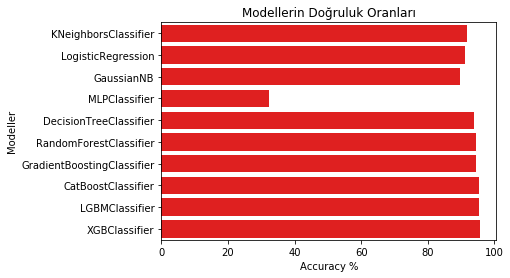

In [127]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');